# MUSI - Aprendizaje Automático
## Práctica bloque I
### Yeray Vivo Valls

Repositorio: https://github.com/Mataformigues/practica_final_aa

---
## 0. Introducción

En esta práctica, utilizaremos una base de datos reales de propiedades en alquiler de Airbnb para tratar de predecir el precio del alquiler.

Comenzamos importando las librerías que utilizaremos a lo largo de todo el *notebook*.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

---
## 1. Preprocesado de los datos

Leemos el fichero CSV que contiene los datos y le echamos un primer vistazo.

In [2]:
airbnb0 = pd.read_csv('airbnb.csv')
print(airbnb0.shape)
airbnb0

(17608, 74)


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11547,https://www.airbnb.com/rooms/11547,20200919153121,2020-09-21,My home at the beach,"Sun, joy, relax, quality, beach & peace.<br />...",NaN,https://a0.muscache.com/pictures/494126/8c151b...,42942,https://www.airbnb.com/users/show/42942,...,10.0,10.0,10.0,NaN,f,1,1,0,0,0.93
1,100831,https://www.airbnb.com/rooms/100831,20200919153121,2020-09-21,HOUSE IN MALLORCA - WiFi(ET-3045),<b>The space</b><br />House situated in a quie...,NaN,https://a0.muscache.com/pictures/675527/72b329...,529151,https://www.airbnb.com/users/show/529151,...,10.0,10.0,10.0,ETV-3045,t,1,1,0,0,1.47
2,105891,https://www.airbnb.com/rooms/105891,20200919153121,2020-09-20,VILLAGE HOUSE WITH POOL: IDEAL FOR FAMILIES,The house is a street on the outskirts of the ...,The village's population does not reach two th...,https://a0.muscache.com/pictures/1036816/f36ce...,549192,https://www.airbnb.com/users/show/549192,...,10.0,9.0,10.0,ETV/6127,t,2,2,0,0,0.14
3,106833,https://www.airbnb.com/rooms/106833,20200919153121,2020-09-20,Villa with a big pool in Mallorca,<b>The space</b><br />This is a restored old b...,NaN,https://a0.muscache.com/pictures/710218/98134c...,551974,https://www.airbnb.com/users/show/551974,...,10.0,9.0,9.0,ET/1961,f,1,1,0,0,0.09
4,130669,https://www.airbnb.com/rooms/130669,20200919153121,2020-09-20,Room great apartment,Located in a residential neighbourhood and 10m...,"Located in the center of the city, within minu...",https://a0.muscache.com/pictures/866653/58dc48...,643065,https://www.airbnb.com/users/show/643065,...,NaN,NaN,NaN,NaN,t,2,0,2,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17603,45489412,https://www.airbnb.com/rooms/45489412,20200919153121,2020-09-20,Villa Mariona,Modern and comfortable villa for 6 people comp...,NaN,https://a0.muscache.com/pictures/105faa9b-5315...,131594018,https://www.airbnb.com/users/show/131594018,...,NaN,NaN,NaN,LIZE84/2017,t,49,49,0,0,NaN
17604,45489550,https://www.airbnb.com/rooms/45489550,20200919153121,2020-09-20,"Holiday Home El Clavet with Mountain View, Wi-...","Located between Pollença and Port de Pollença,...",NaN,https://a0.muscache.com/pictures/f7e347f8-894c...,285670200,https://www.airbnb.com/users/show/285670200,...,NaN,NaN,NaN,NaN,t,90,90,0,0,NaN
17605,45493152,https://www.airbnb.com/rooms/45493152,20200919153121,2020-09-20,Es Molinet Selva villa Mallorca 197,"Magnificent finca with pool, garden and great ...",NaN,https://a0.muscache.com/pictures/2473f78b-359e...,3893191,https://www.airbnb.com/users/show/3893191,...,NaN,NaN,NaN,00551ETV,t,133,133,0,0,NaN
17606,45496032,https://www.airbnb.com/rooms/45496032,20200919153121,2020-09-21,"Hab. con terraza y baño privado,piscina compar...",NaN,Habitación doble a la entrada del puerto muy c...,https://a0.muscache.com/pictures/2dd9c712-7b01...,350176105,https://www.airbnb.com/users/show/350176105,...,NaN,NaN,NaN,NaN,t,1,0,1,0,NaN


Aquí tenemos una lista de sus 74 campos:

In [3]:
list(airbnb0.columns)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30',
 'availa

Seleccionamos los campos que parecen relevantes para la predicción del precio (*features*), así como el mismo precio (*target*) y cambiamos algunos nombres por comodidad.

In [4]:
airbnb = airbnb0[['neighbourhood_cleansed','latitude','longitude','amenities','property_type','room_type','accommodates',
                  'bathrooms_text','bedrooms','beds','review_scores_rating','price']]
airbnb = airbnb.rename(columns={'neighbourhood_cleansed':'neighbourhood',
                      'property_type':'property',
                      'room_type':'room',
                      'bathrooms_text':'bathrooms',
                      'review_scores_rating':'review'})
airbnb

,neighbourhood,latitude,longitude,amenities,property,room,accommodates,bathrooms,bedrooms,beds,review,price
0,Calvià,39.51888,2.48182,"[""Oven"", ""Wifi"", ""Coffee maker"", ""Dishes and s...",Entire apartment,Entire home/apt,2,1 bath,1.0,1.0,96.0,$89.00
1,Santa Margalida,39.76347,3.16255,"[""First aid kit"", ""Hair dryer"", ""Iron"", ""Washe...",Entire house,Entire home/apt,8,3 baths,4.0,7.0,100.0,$175.00
2,Maria de la Salut,39.66044,3.07165,"[""Smoke alarm"", ""Oven"", ""Wifi"", ""Garden or bac...",Entire townhouse,Entire home/apt,6,2 baths,3.0,4.0,97.0,$140.00
3,Sant Llorenç des Cardassar,39.61600,3.30121,"[""Pool"", ""Free parking on premises"", ""Air cond...",Entire villa,Entire home/apt,4,1 bath,2.0,4.0,98.0,$200.00
4,Palma de Mallorca,39.56478,2.60333,"[""Pool"", ""Washer"", ""Air conditioning"", ""Kitche...",Private room in apartment,Private room,2,1 bath,1.0,2.0,NaN,$110.00
...,...,...,...,...,...,...,...,...,...,...,...,...
17603,Muro,39.76505,3.12689,"[""Oven"", ""Wifi"", ""Garden or backyard"", ""Coffee...",Entire villa,Entire home/apt,6,3.5 baths,3.0,4.0,NaN,$195.00
17604,Pollença,39.89835,3.03647,"[""Hair dryer"", ""Washer"", ""Free parking on prem...",Entire villa,Entire home/apt,9,3 baths,5.0,8.0,NaN,$110.00
17605,Selva,39.75437,2.90504,"[""Oven"", ""Wifi"", ""Garden or backyard"", ""Coffee...",Entire villa,Entire home/apt,6,2 baths,3.0,4.0,NaN,$179.00
17606,Andratx,39.54550,2.39348,"[""Oven"", ""Bread maker"", ""Extra pillows and bla...",Private room in apartment,Private room,2,1 bath,1.0,1.0,NaN,$42.00


Vemos que muchas columnas contienen datos en formato no numérico, lo cual deberá corregirse para poder utilizarlos para la predicción.

---
### 1.1 Arreglo del formato de columnas

#### 1.1.1 Arreglo de la columna `price`

La columna `price` contiene los números en formato `str` y con un símbolo de dólar delante. Además, los millares están separados por comas.

In [5]:
print(list(airbnb.price.unique()))

['$89.00', '$175.00', '$140.00', '$200.00', '$110.00', '$75.00', '$90.00', '$235.00', '$45.00', '$18.00', '$50.00', '$150.00', '$46.00', '$70.00', '$125.00', '$69.00', '$78.29', '$180.00', '$185.00', '$115.00', '$40.00', '$650.00', '$85.00', '$36.00', '$88.00', '$100.00', '$39.00', '$360.00', '$102.00', '$80.00', '$120.00', '$126.00', '$157.00', '$78.00', '$171.00', '$346.00', '$135.00', '$144.00', '$250.00', '$485.00', '$93.00', '$99.00', '$170.00', '$500.00', '$400.00', '$160.00', '$479.00', '$42.00', '$97.00', '$217.00', '$173.00', '$208.00', '$65.00', '$68.43', '$251.00', '$164.00', '$300.00', '$76.00', '$134.00', '$113.00', '$176.00', '$95.00', '$79.00', '$299.00', '$35.00', '$54.00', '$60.00', '$980.00', '$241.00', '$106.00', '$37.00', '$26.00', '$168.00', '$47.00', '$358.00', '$254.00', '$310.00', '$82.00', '$38.00', '$98.00', '$240.00', '$130.00', '$68.00', '$295.00', '$487.00', '$61.00', '$468.00', '$359.00', '$22.00', '$475.00', '$114.00', '$165.00', '$320.00', '$499.00', '$1

In [6]:
airbnb.price = airbnb[['price']].applymap(lambda x: float(x[1:].replace(',','')))

In [7]:
print(list(airbnb.price.unique()))

[89.0, 175.0, 140.0, 200.0, 110.0, 75.0, 90.0, 235.0, 45.0, 18.0, 50.0, 150.0, 46.0, 70.0, 125.0, 69.0, 78.29, 180.0, 185.0, 115.0, 40.0, 650.0, 85.0, 36.0, 88.0, 100.0, 39.0, 360.0, 102.0, 80.0, 120.0, 126.0, 157.0, 78.0, 171.0, 346.0, 135.0, 144.0, 250.0, 485.0, 93.0, 99.0, 170.0, 500.0, 400.0, 160.0, 479.0, 42.0, 97.0, 217.0, 173.0, 208.0, 65.0, 68.43, 251.0, 164.0, 300.0, 76.0, 134.0, 113.0, 176.0, 95.0, 79.0, 299.0, 35.0, 54.0, 60.0, 980.0, 241.0, 106.0, 37.0, 26.0, 168.0, 47.0, 358.0, 254.0, 310.0, 82.0, 38.0, 98.0, 240.0, 130.0, 68.0, 295.0, 487.0, 61.0, 468.0, 359.0, 22.0, 475.0, 114.0, 165.0, 320.0, 499.0, 145.0, 220.0, 151.0, 136.0, 480.0, 880.0, 252.0, 213.0, 850.0, 24.0, 315.0, 255.0, 122.0, 194.0, 187.0, 226.0, 67.0, 156.0, 59.0, 289.0, 163.0, 316.0, 182.29, 137.0, 228.0, 210.0, 232.0, 195.0, 74.0, 133.0, 104.0, 557.0, 350.0, 86.0, 294.0, 193.0, 53.0, 260.0, 71.0, 58.0, 83.0, 215.0, 524.0, 258.0, 605.0, 900.0, 109.0, 172.0, 154.0, 710.0, 219.0, 43.0, 275.0, 190.0, 645.0, 3

#### 1.1.2 Arreglo de la columna `bathrooms`

La columna `bathrooms` contiene el número de baños en formato `str` mezclado con texto, y en los casos en que la cantidad es 0.5, aparece la palabra "*half-bath*" en lugar del número. La columna, además, contiene 8 NaN, pero eso lo corregiremos más adelante.

In [8]:
print('nan:',airbnb.bathrooms.isna().sum())
list(dict(airbnb.bathrooms.value_counts()).keys())

nan: 8


['2 baths',
 '1 bath',
 '3 baths',
 '4 baths',
 '2.5 baths',
 '1 private bath',
 '1 shared bath',
 '1.5 baths',
 '5 baths',
 '3.5 baths',
 '4.5 baths',
 '6 baths',
 '5.5 baths',
 '1.5 shared baths',
 '2 shared baths',
 '7 baths',
 '6.5 baths',
 '8 baths',
 '0 baths',
 '9 baths',
 '7.5 baths',
 '2.5 shared baths',
 '11 baths',
 'Half-bath',
 '3 shared baths',
 '0 shared baths',
 '8.5 baths',
 '4 shared baths',
 '12 baths',
 'Shared half-bath',
 '10 baths',
 '13 baths',
 '3.5 shared baths',
 '9.5 baths',
 '14 baths',
 '12.5 baths',
 '12 shared baths',
 '16 baths',
 '32 baths',
 'Private half-bath',
 '19 baths',
 '13 shared baths']

In [9]:
airbnb.bathrooms = airbnb[['bathrooms']].applymap(lambda x: '0.5 ' if 'half' in str(x).lower() else x)
airbnb.bathrooms = airbnb[['bathrooms']].applymap(lambda x: float(x[:x.index(' ')]) if type(x) == type('') else x)

In [10]:
print('na:',airbnb.bathrooms.isna().sum())
print(list(dict(airbnb.bathrooms.value_counts()).keys()))

na: 8
[2.0, 1.0, 3.0, 4.0, 2.5, 1.5, 5.0, 3.5, 4.5, 6.0, 5.5, 7.0, 6.5, 8.0, 0.0, 9.0, 0.5, 7.5, 11.0, 12.0, 8.5, 13.0, 10.0, 9.5, 14.0, 12.5, 32.0, 16.0, 19.0]


---
### 1.2 Búsqueda de categorías relevantes

En este apartado, buscamos dentro de las columnas categóricas (`amenities`, `property`, `rooms` y `neighbourhood`) categorías destacadas que puedan servir a la regresión.

#### 1.2.1 *Amenities*

La columna `amenities` contiene listas (en formato `str`) de servicios incluidos en el alquiler.

In [11]:
df_amenities = airbnb[['amenities','price']]
df_amenities

,amenities,price
0,"[""Oven"", ""Wifi"", ""Coffee maker"", ""Dishes and s...",89.0
1,"[""First aid kit"", ""Hair dryer"", ""Iron"", ""Washe...",175.0
2,"[""Smoke alarm"", ""Oven"", ""Wifi"", ""Garden or bac...",140.0
3,"[""Pool"", ""Free parking on premises"", ""Air cond...",200.0
4,"[""Pool"", ""Washer"", ""Air conditioning"", ""Kitche...",110.0
...,...,...
17603,"[""Oven"", ""Wifi"", ""Garden or backyard"", ""Coffee...",195.0
17604,"[""Hair dryer"", ""Washer"", ""Free parking on prem...",110.0
17605,"[""Oven"", ""Wifi"", ""Garden or backyard"", ""Coffee...",179.0
17606,"[""Oven"", ""Bread maker"", ""Extra pillows and bla...",42.0


In [12]:
amenities_count = {}
amenities_row_count = []

for amenity_list in df_amenities.amenities:
    
    amenity_list = eval(amenity_list)
    
    amenities_row_count.append(len(amenity_list))
    
    for amenity in amenity_list:
        
        if amenity not in amenities_count: amenities_count[amenity] = 0
        amenities_count[amenity] += 1

amenities_count = {x[0]:round(x[1]/len(airbnb0),4) for x in sorted(amenities_count.items(), key = lambda x:x[1])}

El siguiente *dataframe* recoge la cantidad de servicios incluidos en cada muestra. ¿Será de utilidad para estimar el precio del alquiler?

In [13]:
pd.DataFrame({'amenities':amenities_row_count}).join(df_amenities[['price']])

,amenities,price
0,23,89.0
1,20,175.0
2,35,140.0
3,10,200.0
4,7,110.0
...,...,...
17603,34,195.0
17604,15,110.0
17605,26,179.0
17606,28,42.0


A continuación se detalla cuántas muestras contienen cada uno de los distintos servicios del *dataset*.

In [14]:
pd.DataFrame({'amenity':list(amenities_count.keys()),'count/n':list(amenities_count.values())})

,amenity,count/n
0,Security monitors,0.0001
1,Music room,0.0001
2,Heated infinity pool,0.0001
3,Gated community,0.0001
4,Rooftop,0.0001
...,...,...
204,Essentials,0.8958
205,Washer,0.8970
206,TV,0.9083
207,Kitchen,0.9341


Un servicio que sea relevante como *feature* categórica de nuestro modelo debería estar distribuido entre las muestras de forma balanceada. Nos quedamos con los servicios presentes entre el 10 y el 90% de las muestras:

In [15]:
amenities = [x for x in amenities_count if amenities_count[x]>=0.1 and amenities_count[x]<=0.9]

len(amenities)

45

In [16]:
dict_amenities = {amenity:[1 if amenity in eval(x) else 0 for x in list(df_amenities.amenities)] for amenity in amenities}

prices = list(df_amenities.price)
amenity_prices = {}
n = len(df_amenities)

for amenity in amenities:
    
    zeros = []
    ones = []
    
    for i in range(n):
        
        if dict_amenities[amenity][i] == 0:
            zeros.append(prices[i])
        else:
            ones.append(prices[i])
    
    amenity_prices[amenity] = [zeros,ones]

Representamos *boxplots* de las distribuciones de precios para las muestras que incluyen (1) y no incluyen (0) cada uno de los 45 servicios candidatos. El porcentaje indica la fracción de muestras que lo incluyen.

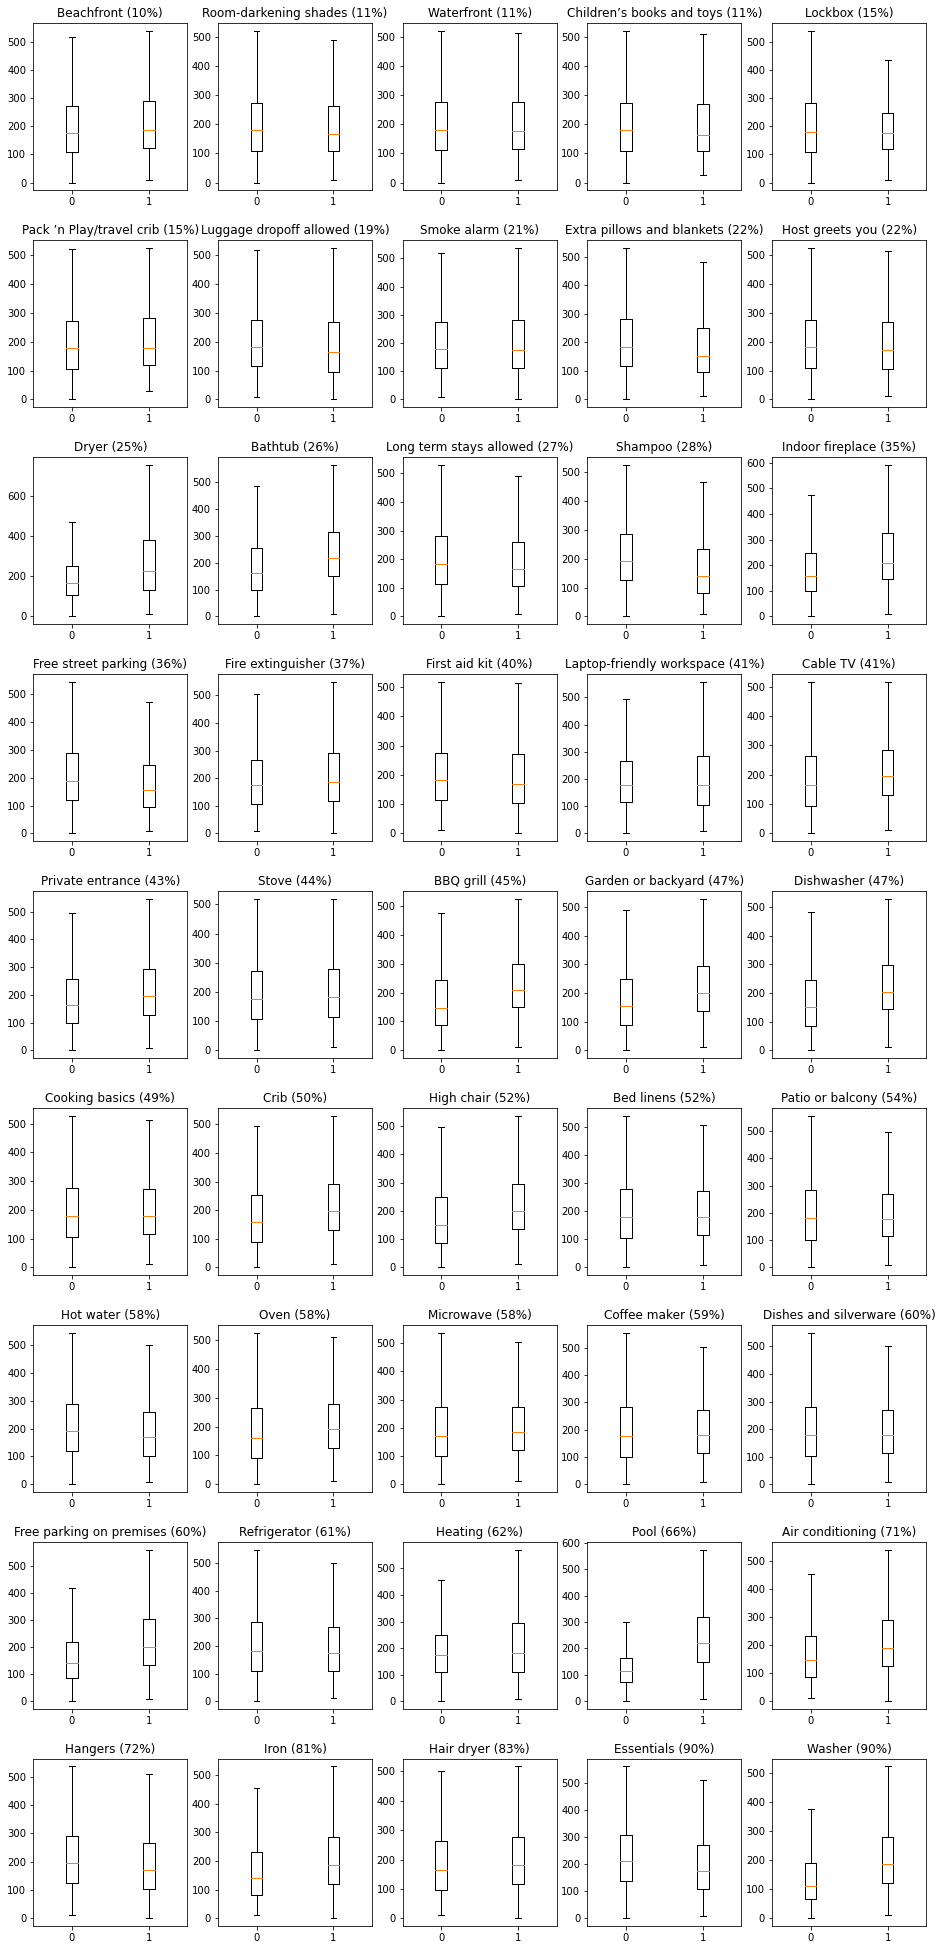

In [17]:
fig, axes = plt.subplots(ncols=5,nrows=9,figsize=(16,35))
ax = axes.flatten()

plt.subplots_adjust(hspace=0.3,wspace=0.2)

for i in range(len(amenities)):
    
    amenity = amenities[i]
    prices0 = amenity_prices[amenity][0]
    prices1 = amenity_prices[amenity][1]
    
    ax[i].boxplot([prices0,prices1],labels=['0','1'],showfliers=False)
    ax[i].set_title('{} ({}%)'.format(amenity,round(100*amenities_count[amenity])))

plt.show()

A simple ojo, vemos que la mayoría de servicios no guardan una relación importante con la distribución de los precios, pero hay algunos que sí (por ejemplo, "Pool (66%)"). Nos interesa cuantificar la diferencia entre cada par de distribuciones para escoger los servicios más correlacionados con el precio. Probamos con el Z-test, más alto cuanto más distintas sean las distribuciones:

$$Z = \frac{\bar{X}_1-\bar{X}_2}{\sqrt{\sigma_{X_1}^2+\sigma_{X_2}^2}}$$

In [18]:
amenity_ztests = {}

for i in range(len(amenities)):
    
    amenity = amenities[i]
    prices0 = amenity_prices[amenity][0]
    prices1 = amenity_prices[amenity][1]
    
    ztest = (np.mean(prices1)-np.mean(prices0))/np.sqrt(np.var(prices0)+np.var(prices1))
    amenity_ztests[amenity] = round(ztest,4)
    
amenity_ztests = {x[0]:x[1] for x in sorted(amenity_ztests.items(),key=lambda x:x[1],reverse=True)}

In [19]:
pd.DataFrame({'amenity':list(amenity_ztests.keys()),'z-test':list(amenity_ztests.values())})

,amenity,z-test
0,Pool,0.2460
1,Dryer,0.1826
2,Indoor fireplace,0.1219
3,Free parking on premises,0.1217
4,Air conditioning,0.1187
5,Washer,0.0906
6,Bathtub,0.0902
7,BBQ grill,0.0870
8,Heating,0.0733
9,Dishwasher,0.0687


Podemos apreciar los valores relativamente altos de algunos servicios. Representamos los cinco de mayor valor $Z$:

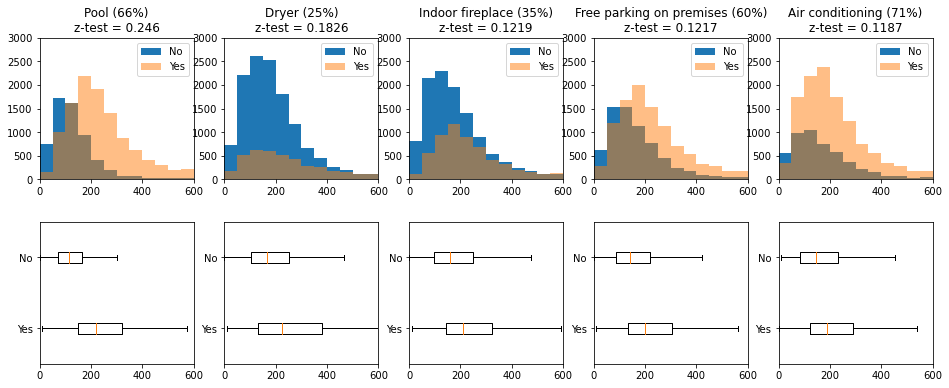

In [20]:
fig, axes = plt.subplots(ncols=5,nrows=2,figsize=(16,6))
ax = axes.flatten()

plt.subplots_adjust(hspace=0.3,wspace=0.2)

for i in range(5):
    
    amenity = list(amenity_ztests.keys())[i]
    prices0 = amenity_prices[amenity][0]
    prices1 = amenity_prices[amenity][1]
    
    ax[i].hist(prices0,label='No',bins=range(0,650,50))
    ax[i].hist(prices1,label='Yes',bins=range(0,650,50),alpha=0.5)
    ax[i].legend(loc='upper right')
    ax[i].set_title('{} ({}%)\nz-test = {}'.format(amenity,round(100*amenities_count[amenity]),amenity_ztests[amenity]))
    ax[i].set_xlim(0,600)
    ax[i].set_ylim(0,3000)
    
    ax[i+5].boxplot([prices1,prices0],labels=['Yes','No'],showfliers=False,vert=False)
    ax[i+5].set_xlim(0,600)

plt.show()

Tras este pequeño estudio, incluimos en nuestro modelo los *features* categóricos (toman valor 0 o 1) `pool` y `dryer`, además de `amenities`, que contiene la cantidad de servicios total de cada muestra. Podemos eliminar la antigua columna de `amenities`, que ya no nos es útil.

In [21]:
airbnb_price = airbnb[['price']]
airbnb = airbnb.drop('price',axis=1)
airbnb = airbnb.drop('amenities',axis=1)
airbnb = airbnb.join(pd.DataFrame({'amenities':amenities_row_count}))
airbnb = airbnb.join(pd.DataFrame({'pool':dict_amenities['Pool']}))
airbnb = airbnb.join(pd.DataFrame({'dryer':dict_amenities['Dryer']}))
airbnb = airbnb.join(airbnb_price)
airbnb

,neighbourhood,latitude,longitude,property,room,accommodates,bathrooms,bedrooms,beds,review,amenities,pool,dryer,price
0,Calvià,39.51888,2.48182,Entire apartment,Entire home/apt,2,1.0,1.0,1.0,96.0,23,1,0,89.0
1,Santa Margalida,39.76347,3.16255,Entire house,Entire home/apt,8,3.0,4.0,7.0,100.0,20,0,0,175.0
2,Maria de la Salut,39.66044,3.07165,Entire townhouse,Entire home/apt,6,2.0,3.0,4.0,97.0,35,1,0,140.0
3,Sant Llorenç des Cardassar,39.61600,3.30121,Entire villa,Entire home/apt,4,1.0,2.0,4.0,98.0,10,1,0,200.0
4,Palma de Mallorca,39.56478,2.60333,Private room in apartment,Private room,2,1.0,1.0,2.0,NaN,7,1,0,110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17603,Muro,39.76505,3.12689,Entire villa,Entire home/apt,6,3.5,3.0,4.0,NaN,34,1,0,195.0
17604,Pollença,39.89835,3.03647,Entire villa,Entire home/apt,9,3.0,5.0,8.0,NaN,15,0,0,110.0
17605,Selva,39.75437,2.90504,Entire villa,Entire home/apt,6,2.0,3.0,4.0,NaN,26,1,0,179.0
17606,Andratx,39.54550,2.39348,Private room in apartment,Private room,2,1.0,1.0,1.0,NaN,28,1,0,42.0


#### 1.2.2 Definición de funciones

En este subapartado, definimos dos funciones que nos serán útiles para seleccionar los siguientes *features* categóricos a incorporar y representar gráficamente cómo se correlacionan con el precio.

In [22]:
def class_select(feature,target='price',df=airbnb):

    df_feature = df[[feature,target]]
    n = len(df_feature)

    classes_count = {}
    for _class in df_feature[feature]:
        if _class not in classes_count: classes_count[_class] = 0
        classes_count[_class] += 1
    classes_count = {x[0]:round(x[1]/n,4) for x in sorted(classes_count.items(), key = lambda x:x[1])}

    classes = [x for x in classes_count if classes_count[x]>=0.1 and classes_count[x]<=0.9]

    dict_classes = {_class:[1 if _class == x else 0 for x in list(df_feature[feature])] for _class in classes}

    target_list = list(df[target])
    class_target_list = {}
    for _class in classes:
        zeros = []
        ones = []
        for i in range(n):
            if dict_classes[_class][i] == 0:
                zeros.append(target_list[i])
            else:
                ones.append(target_list[i])
        class_target_list[_class] = [zeros,ones]
    
    class_ztests = {}
    
    for i in range(len(classes)):
        
        _class = classes[i]
        target0 = class_target_list[_class][0]
        target1 = class_target_list[_class][1]
        
        ztest = (np.mean(target1)-np.mean(target0))/np.sqrt(np.var(target0)+np.var(target1))
        class_ztests[_class] = round(ztest,4)
        
    class_ztests = {x[0]:x[1] for x in sorted(class_ztests.items(),key=lambda x:x[1],reverse=True)}
    
    return df_feature, classes_count, classes, dict_classes, class_target_list, class_ztests

In [23]:
def histbox(classes,class_target_list,classes_count,class_ztests):

    n = len(classes)

    fig, axes = plt.subplots(ncols=n,nrows=2,figsize=(n*16/5,6))
    ax = axes.flatten()

    plt.subplots_adjust(hspace=0.3,wspace=0.2)

    for i in range(n):
        _class = classes[i]
        targets0 = class_target_list[_class][0]
        targets1 = class_target_list[_class][1]
        ax[i].hist(targets0,label='No',bins=range(0,650,50))
        ax[i].hist(targets1,label='Yes',bins=range(0,650,50),alpha=0.5)
        ax[i].legend(loc='upper right')
        ax[i].set_title('{} ({}%)\nz-test = {}'.format(_class,round(100*classes_count[_class]),class_ztests[_class]))
        ax[i].set_xlim(0,600)
        ax[i].set_ylim(0,3000)
        ax[i+n].boxplot([targets1,targets0],labels=['Yes','No'],showfliers=False,vert=False)
        ax[i+n].set_xlim(0,600)

    plt.show()

#### 1.2.3 *Properties*

Esta vez buscaremos categorías dentro de la columna `property` que puedan relacionarse con el precio. Llamamos una de las funciones definidas antes para que las encuentre.

In [24]:
df_property, properties_count, properties, dict_properties, property_prices, property_ztests = class_select('property')

El siguiente *dataframe* muestra los tipos de propiedad en alquiler que representan entre el 10 y el 90% de las muestras del *dataset*, y sus valores $Z$:

In [25]:
pd.DataFrame({'property':[item for item in properties],
            'count/n':[properties_count[item] for item in properties],
            'z-test':[property_ztests[item] for item in properties]})

,property,count/n,z-test
0,Entire apartment,0.1851,-0.2829
1,Entire house,0.2739,0.0224
2,Entire villa,0.2770,0.2559


Los representamos:

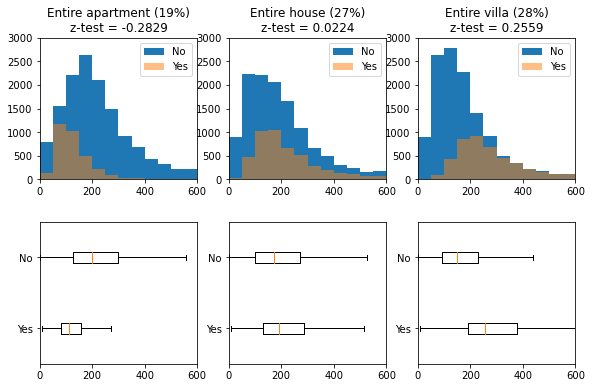

In [26]:
histbox(properties,property_prices,properties_count,property_ztests)

Decidimos incluir dos nuevas *features* en el modelo: `villa` y `apartment`.

In [27]:
airbnb_price = airbnb[['price']]
airbnb = airbnb.drop('price',axis=1)
airbnb = airbnb.join(pd.DataFrame({'villa':dict_properties['Entire villa']}))
airbnb = airbnb.join(pd.DataFrame({'apartment':dict_properties['Entire apartment']}))
airbnb = airbnb.join(airbnb_price)
airbnb

,neighbourhood,latitude,longitude,property,room,accommodates,bathrooms,bedrooms,beds,review,amenities,pool,dryer,villa,apartment,price
0,Calvià,39.51888,2.48182,Entire apartment,Entire home/apt,2,1.0,1.0,1.0,96.0,23,1,0,0,1,89.0
1,Santa Margalida,39.76347,3.16255,Entire house,Entire home/apt,8,3.0,4.0,7.0,100.0,20,0,0,0,0,175.0
2,Maria de la Salut,39.66044,3.07165,Entire townhouse,Entire home/apt,6,2.0,3.0,4.0,97.0,35,1,0,0,0,140.0
3,Sant Llorenç des Cardassar,39.61600,3.30121,Entire villa,Entire home/apt,4,1.0,2.0,4.0,98.0,10,1,0,1,0,200.0
4,Palma de Mallorca,39.56478,2.60333,Private room in apartment,Private room,2,1.0,1.0,2.0,NaN,7,1,0,0,0,110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17603,Muro,39.76505,3.12689,Entire villa,Entire home/apt,6,3.5,3.0,4.0,NaN,34,1,0,1,0,195.0
17604,Pollença,39.89835,3.03647,Entire villa,Entire home/apt,9,3.0,5.0,8.0,NaN,15,0,0,1,0,110.0
17605,Selva,39.75437,2.90504,Entire villa,Entire home/apt,6,2.0,3.0,4.0,NaN,26,1,0,1,0,179.0
17606,Andratx,39.54550,2.39348,Private room in apartment,Private room,2,1.0,1.0,1.0,NaN,28,1,0,0,0,42.0


#### 1.2.4 *Rooms*

Repetimos la búsqueda ahora en la columna `room`, que muestra el tipo de alojamiento que se ofrece en cada muestra.

In [28]:
df_room, rooms_count, rooms, dict_rooms, room_prices, room_ztests = class_select('room')

In [29]:
pd.DataFrame({'room':[item for item in rooms],
            'count/n':[rooms_count[item] for item in rooms],
            'z-test':[room_ztests[item] for item in rooms]})

,room,count/n,z-test
0,Entire home/apt,0.8956,0.2665


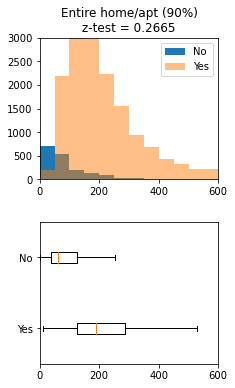

In [30]:
histbox(rooms,room_prices,rooms_count,room_ztests)

En esta ocasión se ha encontrado un único tipo de alojamiento que cumpla con los requisitos. Lo incluimos en el modelo como `entire`.

In [31]:
airbnb_price = airbnb[['price']]
airbnb = airbnb.drop('price',axis=1)
airbnb = airbnb.join(pd.DataFrame({'entire':dict_rooms['Entire home/apt']}))
airbnb = airbnb.join(airbnb_price)
airbnb

,neighbourhood,latitude,longitude,property,room,accommodates,bathrooms,bedrooms,beds,review,amenities,pool,dryer,villa,apartment,entire,price
0,Calvià,39.51888,2.48182,Entire apartment,Entire home/apt,2,1.0,1.0,1.0,96.0,23,1,0,0,1,1,89.0
1,Santa Margalida,39.76347,3.16255,Entire house,Entire home/apt,8,3.0,4.0,7.0,100.0,20,0,0,0,0,1,175.0
2,Maria de la Salut,39.66044,3.07165,Entire townhouse,Entire home/apt,6,2.0,3.0,4.0,97.0,35,1,0,0,0,1,140.0
3,Sant Llorenç des Cardassar,39.61600,3.30121,Entire villa,Entire home/apt,4,1.0,2.0,4.0,98.0,10,1,0,1,0,1,200.0
4,Palma de Mallorca,39.56478,2.60333,Private room in apartment,Private room,2,1.0,1.0,2.0,NaN,7,1,0,0,0,0,110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17603,Muro,39.76505,3.12689,Entire villa,Entire home/apt,6,3.5,3.0,4.0,NaN,34,1,0,1,0,1,195.0
17604,Pollença,39.89835,3.03647,Entire villa,Entire home/apt,9,3.0,5.0,8.0,NaN,15,0,0,1,0,1,110.0
17605,Selva,39.75437,2.90504,Entire villa,Entire home/apt,6,2.0,3.0,4.0,NaN,26,1,0,1,0,1,179.0
17606,Andratx,39.54550,2.39348,Private room in apartment,Private room,2,1.0,1.0,1.0,NaN,28,1,0,0,0,0,42.0


#### 1.2.5 *Neighbourhood*

Finalmente, buscamos nuevas *features* categóricas en la columna `neighbourhood`, que recoge el municipio de cada muestra.

In [32]:
(df_neighbourhood, neighbourhoods_count, neighbourhoods, dict_neighbourhoods, neighbourhood_prices,
 neighbourhood_ztests) = class_select('neighbourhood')

In [33]:
pd.DataFrame({'neighbourhood':[item for item in neighbourhoods],
            'count/n':[neighbourhoods_count[item] for item in neighbourhoods],
            'z-test':[neighbourhood_ztests[item] for item in neighbourhoods]})

,neighbourhood,count/n,z-test
0,Palma de Mallorca,0.1109,-0.1754
1,Pollença,0.1288,0.0224


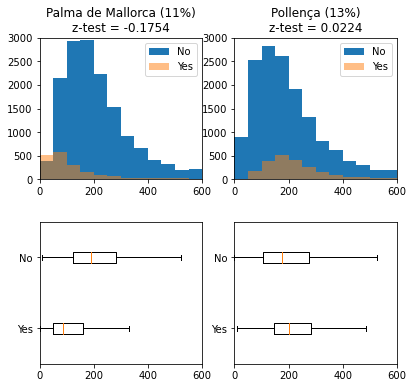

In [34]:
histbox(neighbourhoods,neighbourhood_prices,neighbourhoods_count,neighbourhood_ztests)

Encontramos dos municipios en los que se encuentra entre el 10 y el 90% de las propiedades en alquiler. Incluimos `palma` en el modelo.

In [35]:
airbnb_price = airbnb[['price']]
airbnb = airbnb.drop('price',axis=1)
airbnb = airbnb.join(pd.DataFrame({'palma':dict_neighbourhoods['Palma de Mallorca']}))
airbnb = airbnb.join(airbnb_price)
airbnb

,neighbourhood,latitude,longitude,property,room,accommodates,bathrooms,bedrooms,beds,review,amenities,pool,dryer,villa,apartment,entire,palma,price
0,Calvià,39.51888,2.48182,Entire apartment,Entire home/apt,2,1.0,1.0,1.0,96.0,23,1,0,0,1,1,0,89.0
1,Santa Margalida,39.76347,3.16255,Entire house,Entire home/apt,8,3.0,4.0,7.0,100.0,20,0,0,0,0,1,0,175.0
2,Maria de la Salut,39.66044,3.07165,Entire townhouse,Entire home/apt,6,2.0,3.0,4.0,97.0,35,1,0,0,0,1,0,140.0
3,Sant Llorenç des Cardassar,39.61600,3.30121,Entire villa,Entire home/apt,4,1.0,2.0,4.0,98.0,10,1,0,1,0,1,0,200.0
4,Palma de Mallorca,39.56478,2.60333,Private room in apartment,Private room,2,1.0,1.0,2.0,NaN,7,1,0,0,0,0,1,110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17603,Muro,39.76505,3.12689,Entire villa,Entire home/apt,6,3.5,3.0,4.0,NaN,34,1,0,1,0,1,0,195.0
17604,Pollença,39.89835,3.03647,Entire villa,Entire home/apt,9,3.0,5.0,8.0,NaN,15,0,0,1,0,1,0,110.0
17605,Selva,39.75437,2.90504,Entire villa,Entire home/apt,6,2.0,3.0,4.0,NaN,26,1,0,1,0,1,0,179.0
17606,Andratx,39.54550,2.39348,Private room in apartment,Private room,2,1.0,1.0,1.0,NaN,28,1,0,0,0,0,0,42.0


---
### 1.3 Arreglo de campos categóricos

Transformamos en números las categorías de los tres campos categóricos restantes de la tabla (`neighbourhood`, `property` y `room`), ordenados de menor a mayor precio medio de la categoría, con la esperanza de que los *features* resultantes se correlacionen con el precio, o al menos sean de utilidad para estimarlo.

In [36]:
def categorize(df,keys,value):
    
    df_categorized = df.copy()
    output = []
    
    for key in keys:
        
        df_grouped = df.groupby(key)[[value]].mean().sort_values(value).index
        dict_sort = {df_grouped[i]:i for i in range(len(df_grouped))}
        dict_sort_inv = {x[1]:x[0] for x in dict_sort.items()}
        
        df_categorized[key] = df_categorized[key].apply(lambda x:dict_sort[x])
        
        output += [dict_sort,dict_sort_inv]
        
    output = [df_categorized] + output
    
    return output

In [37]:
(airbnb,
    _, dict_sort_inv_neighbourhood,
    _, dict_sort_property_inv,
    _, dict_room_inv) = categorize(airbnb,['neighbourhood','property','room'],'price')
airbnb

,neighbourhood,latitude,longitude,property,room,accommodates,bathrooms,bedrooms,beds,review,amenities,pool,dryer,villa,apartment,entire,palma,price
0,49,39.51888,2.48182,45,2,2,1.0,1.0,1.0,96.0,23,1,0,0,1,1,0,89.0
1,2,39.76347,3.16255,60,2,8,3.0,4.0,7.0,100.0,20,0,0,0,0,1,0,175.0
2,1,39.66044,3.07165,51,2,6,2.0,3.0,4.0,97.0,35,1,0,0,0,1,0,140.0
3,13,39.61600,3.30121,68,2,4,1.0,2.0,4.0,98.0,10,1,0,1,0,1,0,200.0
4,0,39.56478,2.60333,16,1,2,1.0,1.0,2.0,NaN,7,1,0,0,0,0,1,110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17603,41,39.76505,3.12689,68,2,6,3.5,3.0,4.0,NaN,34,1,0,1,0,1,0,195.0
17604,38,39.89835,3.03647,68,2,9,3.0,5.0,8.0,NaN,15,0,0,1,0,1,0,110.0
17605,34,39.75437,2.90504,68,2,6,2.0,3.0,4.0,NaN,26,1,0,1,0,1,0,179.0
17606,52,39.54550,2.39348,16,1,2,1.0,1.0,1.0,NaN,28,1,0,0,0,0,0,42.0


---
### 1.4 Arreglo de los NaN

La siguiente tabla muestra la cantidad de valores NaN en cada una de las columnas de nuestros datos actuales.

In [38]:
features = []
nans = []
for i in range(np.shape(airbnb)[1]):
    features.append(airbnb.columns.values[i])
    nans.append(airbnb.iloc[:,i].isna().sum())
pd.DataFrame({'feature':features,'nan count':nans})

,feature,nan count
0,neighbourhood,0
1,latitude,0
2,longitude,0
3,property,0
4,room,0
5,accommodates,0
6,bathrooms,8
7,bedrooms,275
8,beds,97
9,review,6651


Ninguno es demasiado elevado frente al número total de muestras (17608), salvo el de la columna `review`. Su cantidad tan elevada de datos nulos nos lleva rechazarlo en el modelo.

Imputamos el resto de NaN con el valor mediano de la columna en que se encuentren:

In [39]:
airbnb = airbnb.drop('review',axis=1)

airbnb.bathrooms = airbnb[['bathrooms']].fillna(airbnb.bathrooms.median())
airbnb.bedrooms = airbnb[['bedrooms']].fillna(airbnb.bedrooms.median())
airbnb.beds = airbnb[['beds']].fillna(airbnb.beds.median())

airbnb

,neighbourhood,latitude,longitude,property,room,accommodates,bathrooms,bedrooms,beds,amenities,pool,dryer,villa,apartment,entire,palma,price
0,49,39.51888,2.48182,45,2,2,1.0,1.0,1.0,23,1,0,0,1,1,0,89.0
1,2,39.76347,3.16255,60,2,8,3.0,4.0,7.0,20,0,0,0,0,1,0,175.0
2,1,39.66044,3.07165,51,2,6,2.0,3.0,4.0,35,1,0,0,0,1,0,140.0
3,13,39.61600,3.30121,68,2,4,1.0,2.0,4.0,10,1,0,1,0,1,0,200.0
4,0,39.56478,2.60333,16,1,2,1.0,1.0,2.0,7,1,0,0,0,0,1,110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17603,41,39.76505,3.12689,68,2,6,3.5,3.0,4.0,34,1,0,1,0,1,0,195.0
17604,38,39.89835,3.03647,68,2,9,3.0,5.0,8.0,15,0,0,1,0,1,0,110.0
17605,34,39.75437,2.90504,68,2,6,2.0,3.0,4.0,26,1,0,1,0,1,0,179.0
17606,52,39.54550,2.39348,16,1,2,1.0,1.0,1.0,28,1,0,0,0,0,0,42.0


La tabla está ahora limpia de valores nulos:

In [40]:
features = []
nans = []
for i in range(np.shape(airbnb)[1]):
    features.append(airbnb.columns.values[i])
    nans.append(airbnb.iloc[:,i].isna().sum())
pd.DataFrame({'feature':features,'nan count':nans})

,feature,nan count
0,neighbourhood,0
1,latitude,0
2,longitude,0
3,property,0
4,room,0
5,accommodates,0
6,bathrooms,0
7,bedrooms,0
8,beds,0
9,amenities,0


---
### 1.5 *Outliers*

Representamos histogramas de cada uno de los *features* de nuestro modelo para intuir la presencia de *outliers* en algunos de ellos:

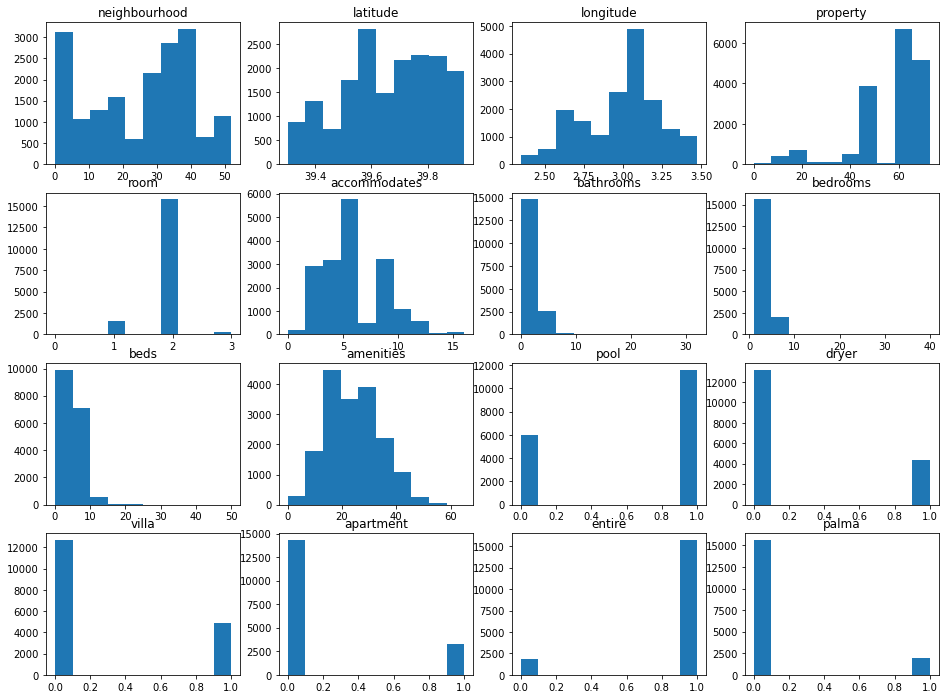

In [41]:
fig, axes = plt.subplots(ncols=4,nrows=4,figsize=(16,12))
ax = axes.flatten()

irange = range(16)#[0] + list(range(3,12))

axi = 0
for i in irange:
    ax[axi].hist(airbnb.iloc[:,i])
    ax[axi].set_title(airbnb.columns.values[i])
    axi += 1

plt.show()

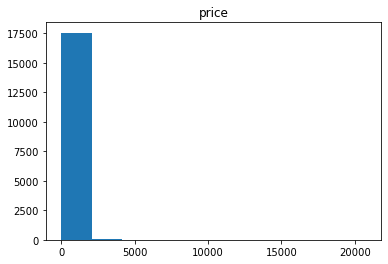

In [42]:
plt.hist(airbnb.price)
plt.title('price')
plt.show()

Consideraremos *outliers* aquellos datos que se encuentren a 1.5 veces el tamaño intercuartil ($IQR$) del primer y el tercer cuartil ($Q1$ y $Q3$):

In [43]:
Q1 = airbnb.quantile(0.25)
Q3 = airbnb.quantile(0.75)
IQR = Q3 - Q1
low = Q1 - 1.5*IQR
high = Q3 + 1.5*IQR

df_outliers = pd.DataFrame()
df_outliers['feature'] = list(airbnb.columns.values)
df_outliers['low'] = list(low)
df_outliers['low'] = df_outliers['low'].apply(lambda x:round(x,2))
df_outliers['high'] = list(high)
df_outliers['high'] = df_outliers['high'].apply(lambda x:round(x,2))

ranges = [[round(airbnb[feature].min(),2),round(airbnb[feature].max(),2)] for feature in df_outliers.feature]
df_outliers['range'] = ranges

outliers_count = []
for i in range(len(df_outliers)):
    ioutliers = airbnb[airbnb[airbnb.columns.values[i]] < low[i]]
    ioutliers = ioutliers.append(airbnb[airbnb[airbnb.columns.values[i]] > high[i]])
    outliers_count.append(len(ioutliers))
df_outliers['count'] = outliers_count

df_outliers

,feature,low,high,range,count
0,neighbourhood,-29.50,78.50,"[0, 52]",0
1,latitude,39.16,40.18,"[39.3, 39.93]",0
2,longitude,2.27,3.67,"[2.35, 3.48]",0
3,property,10.50,102.50,"[0, 73]",93
4,room,2.00,2.00,"[0, 3]",1838
5,accommodates,-2.00,14.00,"[0, 16]",125
6,bathrooms,-2.00,6.00,"[0.0, 32.0]",238
7,bedrooms,-1.00,7.00,"[1.0, 40.0]",109
8,beds,-1.50,10.50,"[0.0, 50.0]",321
9,amenities,-6.50,53.50,"[0, 65]",29


La detección de *outliers* ha afectado especialmente a las variables categóricas: `dryer`, `apartment`, `entire` y `palma` tienen sus ceros y unos muy desbalanceados, por lo que no es recomendable usarlas en el modelo. Otra *feature* muy desbalanceada es `room` (recordemos que proviene de la misma columna de datos original que `entire`): de los cuatro valores distintos que toma, tan solo sobreviviría uno a la poda de *outliers*, de modo que su uso no tiene sentido.

De eliminarse todas las muestras que contienen outliers, tan solo sobreviviría el 46% del *dataset*:

In [44]:
airbnb2 = airbnb.copy()
for i in range(len(df_outliers)):
    airbnb2 = airbnb2[airbnb2[df_outliers.iloc[i,0]] >= df_outliers.iloc[i,1]]
    airbnb2 = airbnb2[airbnb2[df_outliers.iloc[i,0]] <= df_outliers.iloc[i,2]]
len(airbnb2)/len(airbnb)

0.4619491140390731

En cambio, prescindiendo de las *features* categóricas con *outliers*, conseguimos salvar el 91%:

In [45]:
airbnb2 = airbnb.drop('room',axis=1)
airbnb2 = airbnb.drop('dryer',axis=1)
airbnb2 = airbnb.drop('apartment',axis=1)
airbnb2 = airbnb.drop('palma',axis=1)
airbnb2 = airbnb.drop('entire',axis=1)
for i in range(len(df_outliers)):
    if df_outliers.iloc[i,0] == 'room': continue
    if df_outliers.iloc[i,0] == 'dryer': continue
    if df_outliers.iloc[i,0] == 'apartment': continue
    if df_outliers.iloc[i,0] == 'palma': continue
    if df_outliers.iloc[i,0] == 'entire': continue
    airbnb2 = airbnb2[airbnb2[df_outliers.iloc[i,0]] >= df_outliers.iloc[i,1]]
    airbnb2 = airbnb2[airbnb2[df_outliers.iloc[i,0]] <= df_outliers.iloc[i,2]]
len(airbnb2)/len(airbnb)

0.9142435256701499

In [46]:
airbnb = airbnb.drop('room',axis=1)
airbnb = airbnb.drop('dryer',axis=1)
airbnb = airbnb.drop('apartment',axis=1)
airbnb = airbnb.drop('palma',axis=1)
airbnb = airbnb.drop('entire',axis=1)
for i in range(len(df_outliers)):
    if df_outliers.iloc[i,0] == 'room': continue
    if df_outliers.iloc[i,0] == 'dryer': continue
    if df_outliers.iloc[i,0] == 'apartment': continue
    if df_outliers.iloc[i,0] == 'palma': continue
    if df_outliers.iloc[i,0] == 'entire': continue
    airbnb = airbnb[airbnb[df_outliers.iloc[i,0]] >= df_outliers.iloc[i,1]]
    airbnb = airbnb[airbnb[df_outliers.iloc[i,0]] <= df_outliers.iloc[i,2]]
    
airbnb

,neighbourhood,latitude,longitude,property,accommodates,bathrooms,bedrooms,beds,amenities,pool,villa,price
0,49,39.51888,2.48182,45,2,1.0,1.0,1.0,23,1,0,89.0
1,2,39.76347,3.16255,60,8,3.0,4.0,7.0,20,0,0,175.0
2,1,39.66044,3.07165,51,6,2.0,3.0,4.0,35,1,0,140.0
3,13,39.61600,3.30121,68,4,1.0,2.0,4.0,10,1,1,200.0
4,0,39.56478,2.60333,16,2,1.0,1.0,2.0,7,1,0,110.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17603,41,39.76505,3.12689,68,6,3.5,3.0,4.0,34,1,1,195.0
17604,38,39.89835,3.03647,68,9,3.0,5.0,8.0,15,0,1,110.0
17605,34,39.75437,2.90504,68,6,2.0,3.0,4.0,26,1,1,179.0
17606,52,39.54550,2.39348,16,2,1.0,1.0,1.0,28,1,0,42.0


---
### 1.6 Correlaciones

En este apartado, buscamos correlaciones entre las variables de nuestro modelo con el objetivo principal de detectar colinealidades.

Empezamos representando un mapa de calor con todas las correlaciones:

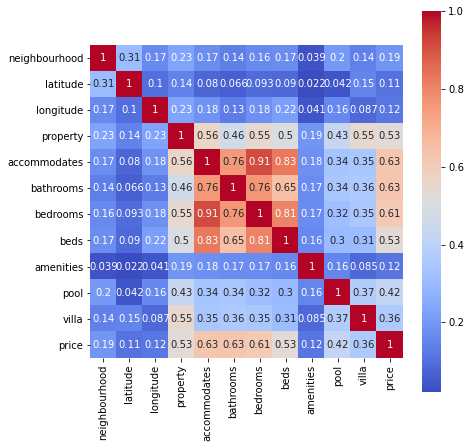

In [47]:
corr = airbnb.corr()

fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corr,cmap='coolwarm',square=True,annot=True)
plt.show()

Observamos una alta correlación entre cuatro de las *features* de nuestro modelo: `accommodates`, `bathrooms`, `bedrooms`y `beds`, patente en el cuadrado rojizo del centro del gráfico. La mayor correlación con el *target* es de 0.63.

Las variables con mayor correlación ($R>0.4$) son:

In [48]:
highly_corr = corr[(np.abs(corr) > 0.4) & (np.abs(corr) < 1)]
highly_corr_melt = highly_corr.melt().dropna()
list_highly_corr_variables = highly_corr_melt['variable'].unique()

print(list_highly_corr_variables)

['property' 'accommodates' 'bathrooms' 'bedrooms' 'beds' 'pool' 'villa'
 'price']


Representamos los gráficos cruzados de estas ocho variables.

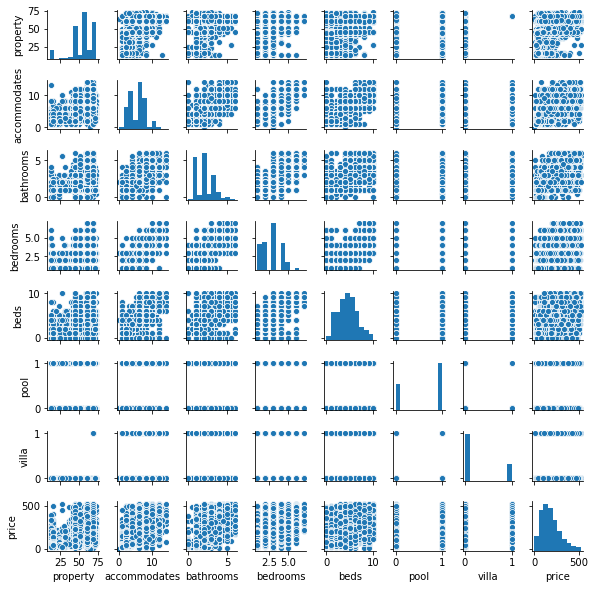

In [49]:
sns.pairplot(data=airbnb[list_highly_corr_variables],height=1)
plt.show()

Es evidente la alta correlación (colinealidad) entre las *features* `accomodates`, `bathrooms`, `bedrooms` y `beds`. Eliminamos todas menos `bathrooms` para reducir la dimensionalidad.

In [50]:
airbnb2 = airbnb.drop(['accommodates','bedrooms','beds'],axis=1)
airbnb2

,neighbourhood,latitude,longitude,property,bathrooms,amenities,pool,villa,price
0,49,39.51888,2.48182,45,1.0,23,1,0,89.0
1,2,39.76347,3.16255,60,3.0,20,0,0,175.0
2,1,39.66044,3.07165,51,2.0,35,1,0,140.0
3,13,39.61600,3.30121,68,1.0,10,1,1,200.0
4,0,39.56478,2.60333,16,1.0,7,1,0,110.0
...,...,...,...,...,...,...,...,...,...
17603,41,39.76505,3.12689,68,3.5,34,1,1,195.0
17604,38,39.89835,3.03647,68,3.0,15,0,1,110.0
17605,34,39.75437,2.90504,68,2.0,26,1,1,179.0
17606,52,39.54550,2.39348,16,1.0,28,1,0,42.0


---
## 2. Regresiones

Una vez hecho el preprocesado de los datos, procedemos a realizar regresiones usando distintos modelos.

---
### 2.1 Una dimensión

Empezamos con un modelo de regresión simple utilizando un solo *feature* para la predicción. Escogemos la variable de mayor correlación con el *target*: `bathrooms`.

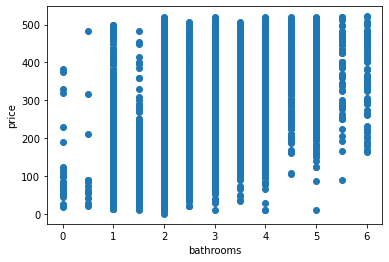

In [51]:
plt.scatter(airbnb2.loc[:,'bathrooms'],airbnb2.iloc[:,-1])
plt.xlabel('bathrooms')
plt.ylabel('price')
plt.show()

#### 2.1.1 *Train* y *test*

Escogemos la variable de entrada a utilizar y separamos el *dataset* en el *set* de entrenamiento y el de testeo, con una relación 80%-20% de muestras:

In [52]:
X = airbnb2.loc[:,'bathrooms']
y = airbnb2.iloc[:,-1]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=86400)

X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)

#### 2.1.2 *Linear regression*

Probamos con una regresión lineal. Normalizamos los datos y los ajustamos a una recta:

In [54]:
scaling_step = ('scaler',MinMaxScaler())
pipe = Pipeline([scaling_step])

X_train_scaled = pipe.fit_transform(X_train)
X_test_scaled = pipe.transform(X_test)

lr = LinearRegression()

lr.fit(X_train_scaled,y_train)
y_pred_train = lr.predict(X_train_scaled)
y_pred_test = lr.predict(X_test_scaled)

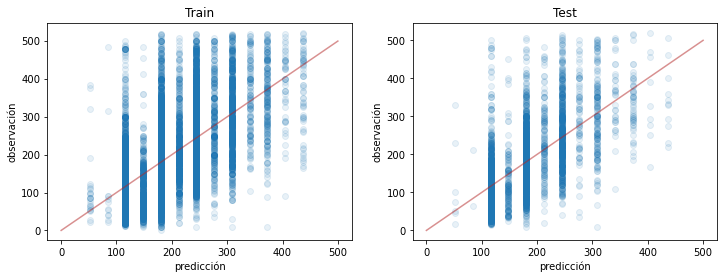

In [55]:
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(12,4))
ax = axes.flatten()

ax[0].scatter(y_pred_train,y_train,alpha=0.1)
ax[0].plot([0,500],[0,500],c='firebrick',alpha=0.5)
ax[0].set_xlabel('predicción')
ax[0].set_ylabel('observación')
ax[0].set_title('Train')
ax[1].scatter(y_pred_test,y_test,alpha=0.1)
ax[1].plot([0,500],[0,500],c='firebrick',alpha=0.5)
ax[1].set_xlabel('predicción')
ax[1].set_ylabel('observación')
ax[1].set_title('Test')

plt.show()

La representación de $y$ vs. $\bar{y}$ no augura un gran resultado.

In [56]:
print('R2 (train):',r2_score(y_train,y_pred_train))
print('R2 (test): ',r2_score(y_test,y_pred_test))
print()
print('RMSE (train):',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('RMSE (test): ',np.sqrt(mean_squared_error(y_test,y_pred_test)))

R2 (train): 0.39638010583433536
R2 (test):  0.3771413051134612

RMSE (train): 82.21807822156717
RMSE (test):  82.61829585310296


La correlación cuadrada es baja, y el error en la predicción del precio está en torno a \$82. Los valores no difieren mucho entre el entrenamiento y el test.

#### 2.1.3 *Decision tree*

Probamos ahora con un árbol de decisión. Para escoger los parámetros, realizamos un *grid search* sobre `max_depth` y `min_samples_leaf`.

In [57]:
scaling_step = ('scaler',MinMaxScaler())
model_step = ('dtr',DecisionTreeRegressor())

pipe = Pipeline([scaling_step,model_step])

param_grid = {'dtr__max_depth': range(10),
              'dtr__min_samples_leaf': range(10)}

dtr_gs = GridSearchCV(pipe, cv=3, n_jobs=-1, param_grid=param_grid, verbose=1)

dtr_gs.fit(X_train, y_train)

time.sleep(1)

print('Best params: ', dtr_gs.best_params_)
print('Best score: ', dtr_gs.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    7.6s finished


Best params:  {'dtr__max_depth': 4, 'dtr__min_samples_leaf': 7}
Best score:  0.4064903780134664


In [58]:
pipe = Pipeline([scaling_step])

X_train_scaled = pipe.fit_transform(X_train)
X_test_scaled = pipe.transform(X_test)

dtr = DecisionTreeRegressor(max_depth=4,min_samples_leaf=7,random_state=86400)

dtr.fit(X_train_scaled,y_train)
y_pred_train = dtr.predict(X_train_scaled)
y_pred_test = dtr.predict(X_test_scaled)

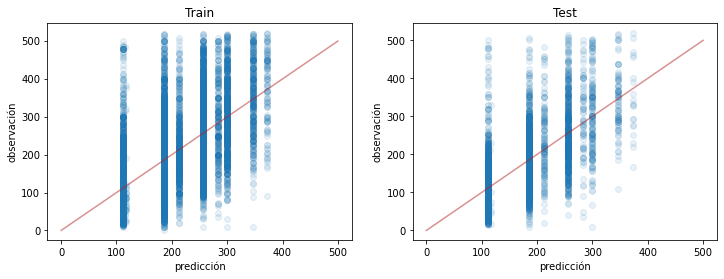

In [59]:
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(12,4))
ax = axes.flatten()

ax[0].scatter(y_pred_train,y_train,alpha=0.1)
ax[0].plot([0,500],[0,500],c='firebrick',alpha=0.5)
ax[0].set_xlabel('predicción')
ax[0].set_ylabel('observación')
ax[0].set_title('Train')
ax[1].scatter(y_pred_test,y_test,alpha=0.1)
ax[1].plot([0,500],[0,500],c='firebrick',alpha=0.5)
ax[1].set_xlabel('predicción')
ax[1].set_ylabel('observación')
ax[1].set_title('Test')

plt.show()

El gráfico muestra unas predicciones más segmentadas que en el caso de la regresión lineal y más acotadas entre dos valores mínimo y máximo, lo cual se debe a la naturaleza del árbol de decisión.

In [60]:
print('R2 (train):',r2_score(y_train,y_pred_train))
print('R2 (test): ',r2_score(y_test,y_pred_test))
print()
print('RMSE (train):',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('RMSE (test): ',np.sqrt(mean_squared_error(y_test,y_pred_test)))

R2 (train): 0.4081044868235226
R2 (test):  0.3867252126020464

RMSE (train): 81.41568342036317
RMSE (test):  81.98020920033872


Los *scores* son bastante similares a los de la regresión lineal.

#### 2.1.4 *Random forest*

Acabamos la regresión unidimensional con un *random forest*. Realizamos un *grid search* para este modelo.

In [61]:
scaling_step = ('scaler',MinMaxScaler())
model_step = ('clf',RandomForestRegressor())

pipe = Pipeline([scaling_step,model_step])

param_grid = {'clf__max_depth': range(8,13),
              'clf__min_samples_leaf': range(5)}

clf_gs = GridSearchCV(pipe, cv=3, n_jobs=-1, param_grid=param_grid, verbose=1)

clf_gs.fit(X_train, y_train)

time.sleep(1)

print('Best params: ', clf_gs.best_params_)
print('Best score: ', clf_gs.best_score_)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   19.5s finished


Best params:  {'clf__max_depth': 8, 'clf__min_samples_leaf': 4}
Best score:  0.40653753393879605


In [62]:
pipe = Pipeline([scaling_step])

X_train_scaled = pipe.fit_transform(X_train)
X_test_scaled = pipe.transform(X_test)

clf = RandomForestRegressor(max_depth=9,min_samples_leaf=1,random_state=86400)

clf.fit(X_train_scaled,y_train)
y_pred_train = clf.predict(X_train_scaled)
y_pred_test = clf.predict(X_test_scaled)

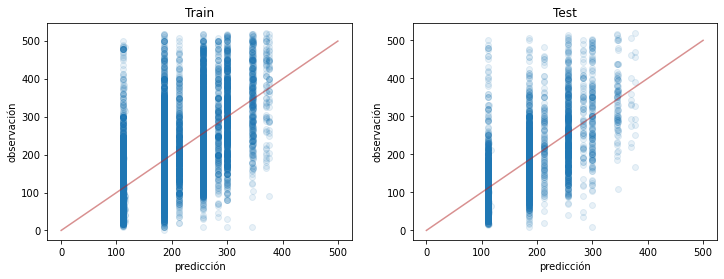

In [63]:
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(12,4))
ax = axes.flatten()

ax[0].scatter(y_pred_train,y_train,alpha=0.1)
ax[0].plot([0,500],[0,500],c='firebrick',alpha=0.5)
ax[0].set_xlabel('predicción')
ax[0].set_ylabel('observación')
ax[0].set_title('Train')
ax[1].scatter(y_pred_test,y_test,alpha=0.1)
ax[1].plot([0,500],[0,500],c='firebrick',alpha=0.5)
ax[1].set_xlabel('predicción')
ax[1].set_ylabel('observación')
ax[1].set_title('Test')

plt.show()

El gráfico recuerda mucho al del *decision tree*.

In [64]:
print('R2 (train):',r2_score(y_train,y_pred_train))
print('R2 (test): ',r2_score(y_test,y_pred_test))
print()
print('RMSE (train):',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('RMSE (test): ',np.sqrt(mean_squared_error(y_test,y_pred_test)))

R2 (train): 0.4081123278354849
R2 (test):  0.3867037770091565

RMSE (train): 81.41514414996188
RMSE (test):  81.98164190152772


Y, además, los *scores* son casi idénticos. Ambos modelos parecen realizar igual la regresión para el caso unidimensional.

#### 2.1.5 *Plots*

Aprovechamos que este modelo puede visualizarse en 2D para hacer unas representaciones.

In [65]:
X_plot = np.arange(0,1,0.01).reshape(-1,1)
y_plot_lr = lr.predict(X_plot)
y_plot_dtr = dtr.predict(X_plot)
y_plot_clf = clf.predict(X_plot)

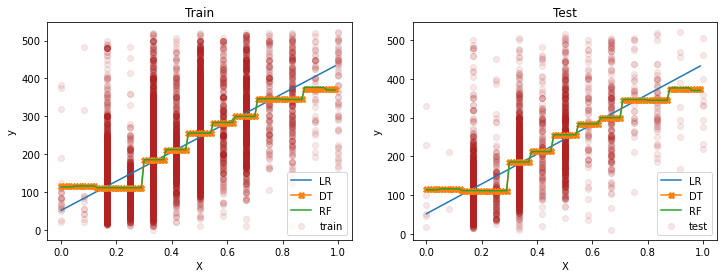

In [66]:
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(12,4))
ax = axes.flatten()

ax[0].scatter(X_train_scaled,y_train,c='firebrick',alpha=0.1,label='train')
ax[0].plot(X_plot,y_plot_lr,label='LR')
ax[0].plot(X_plot,y_plot_dtr,'X-',label='DT')
ax[0].plot(X_plot,y_plot_clf,label='RF')
ax[0].set_xlabel('X')
ax[0].set_ylabel('y')
ax[0].set_title('Train')
ax[0].legend()

ax[1].scatter(X_test_scaled,y_test,c='firebrick',alpha=0.1,label='test')
ax[1].plot(X_plot,y_plot_lr,label='LR')
ax[1].plot(X_plot,y_plot_dtr,'X-',label='DT')
ax[1].plot(X_plot,y_plot_clf,label='RF')
ax[1].set_xlabel('X')
ax[1].set_ylabel('y')
ax[1].set_title('Test')
ax[1].legend()

plt.show()

Al tratarse de una distribución de los datos tan desviada, ninguno de los tres modelos pueden ajustarla medianamente bien. Llama la atención la práctica igualdad entre las funciones subyacentes al modelo *decision tree* y el *random forest*, y la similitud con la línea del *linear regression*.

---
### 2.2 Todas las dimensiones

A continuación vamos a pasar a considerar todas las dimensiones del modelo para realizar las regresiones.

#### 2.2.1 *Train* y *test*

*Sets* de entrenamiento y testeo.

In [67]:
X = airbnb2.iloc[:,:-1]
y = airbnb2.iloc[:,-1]

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=86400)

#### 2.2.2 *Linear regression*

Empezamos con una regresión lineal.

In [69]:
pipe = Pipeline([scaling_step])

X_train_scaled = pipe.fit_transform(X_train)
X_test_scaled = pipe.transform(X_test)

lr = LinearRegression()

lr.fit(X_train_scaled,y_train)
y_pred_train = lr.predict(X_train_scaled)
y_pred_test = lr.predict(X_test_scaled)

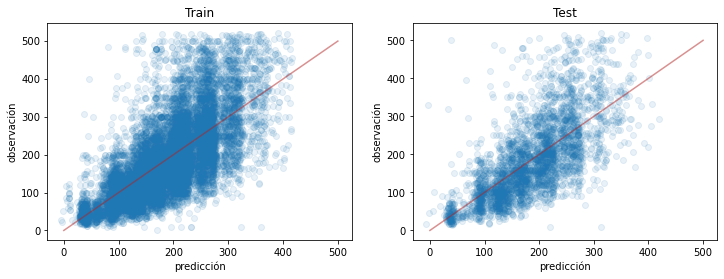

In [70]:
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(12,4))
ax = axes.flatten()

ax[0].scatter(y_pred_train,y_train,alpha=0.1)
ax[0].plot([0,500],[0,500],c='firebrick',alpha=0.5)
ax[0].set_xlabel('predicción')
ax[0].set_ylabel('observación')
ax[0].set_title('Train')
ax[1].scatter(y_pred_test,y_test,alpha=0.1)
ax[1].plot([0,500],[0,500],c='firebrick',alpha=0.5)
ax[1].set_xlabel('predicción')
ax[1].set_ylabel('observación')
ax[1].set_title('Test')

plt.show()

Usando todas las dimensiones, la regresión resulta más difusa, aunque siguen apreciándose ciertas segmentaciones. Quizás sea debido al mayor peso otorgado por el modelo a cierta variable que presenta dicha segmentación, lo cual no es de extrañar teniendo en cuenta la "alta" correlación con el *target* de la variable `bathroom`.

In [71]:
print('R2 (train):',r2_score(y_train,y_pred_train))
print('R2 (test): ',r2_score(y_test,y_pred_test))
print()
print('RMSE (train):',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('RMSE (test): ',np.sqrt(mean_squared_error(y_test,y_pred_test)))

R2 (train): 0.4930411119870597
R2 (test):  0.4682639011245131

RMSE (train): 75.34803305370961
RMSE (test):  76.33602464743157


Los *scores*, por ahora, mejoran respecto al modelo anterior.

#### 2.2.3 *Decision tree*

Vovlemos al *decision tree*, y realizamos un *grid search*.

In [72]:
scaling_step = ('scaler',MinMaxScaler())
model_step = ('dtr',DecisionTreeRegressor())

pipe = Pipeline([scaling_step,model_step])

param_grid = {'dtr__max_depth': range(10),
              'dtr__min_samples_leaf': range(15)}

dtr_gs = GridSearchCV(pipe, cv=3, n_jobs=-1, param_grid=param_grid, verbose=1)

dtr_gs.fit(X_train, y_train)

time.sleep(1)

print('Best params: ', dtr_gs.best_params_)
print('Best score: ', dtr_gs.best_score_)

Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:   12.8s finished


Best params:  {'dtr__max_depth': 5, 'dtr__min_samples_leaf': 13}
Best score:  0.5025789106023337


In [73]:
pipe = Pipeline([scaling_step])

X_train_scaled = pipe.fit_transform(X_train)
X_test_scaled = pipe.transform(X_test)

dtr = DecisionTreeRegressor(max_depth=5,min_samples_leaf=13,random_state=86400)

dtr.fit(X_train_scaled,y_train)
y_pred_train = dtr.predict(X_train_scaled)
y_pred_test = dtr.predict(X_test_scaled)

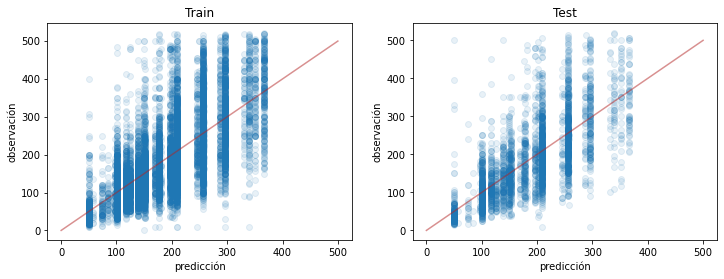

In [74]:
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(12,4))
ax = axes.flatten()

ax[0].scatter(y_pred_train,y_train,alpha=0.1)
ax[0].plot([0,500],[0,500],c='firebrick',alpha=0.5)
ax[0].set_xlabel('predicción')
ax[0].set_ylabel('observación')
ax[0].set_title('Train')
ax[1].scatter(y_pred_test,y_test,alpha=0.1)
ax[1].plot([0,500],[0,500],c='firebrick',alpha=0.5)
ax[1].set_xlabel('predicción')
ax[1].set_ylabel('observación')
ax[1].set_title('Test')

plt.show()

La naturaleza del *decision tree* devuelve la segmentación a las predicciones.

In [75]:
print('R2 (train):',r2_score(y_train,y_pred_train))
print('R2 (test): ',r2_score(y_test,y_pred_test))
print()
print('RMSE (train):',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('RMSE (test): ',np.sqrt(mean_squared_error(y_test,y_pred_test)))

R2 (train): 0.5127582937674224
R2 (test):  0.49223330759683737

RMSE (train): 73.86824424937389
RMSE (test):  74.59566185748744


Los *scores* son algo mejores que los del modelo lineal.

#### 2.2.4 *Random forest*

In [76]:
scaling_step = ('scaler',MinMaxScaler())
model_step = ('clf',RandomForestRegressor())

pipe = Pipeline([scaling_step,model_step])

param_grid = {'clf__max_depth': range(10,15),
              'clf__min_samples_leaf': range(5)}

clf_gs = GridSearchCV(pipe, cv=3, n_jobs=-1, param_grid=param_grid, verbose=1)

clf_gs.fit(X_train, y_train)

time.sleep(1)

print('Best params: ', clf_gs.best_params_)
print('Best score: ', clf_gs.best_score_)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  2.3min finished


Best params:  {'clf__max_depth': 11, 'clf__min_samples_leaf': 3}
Best score:  0.5322590971018492


In [77]:
pipe = Pipeline([scaling_step])

X_train_scaled = pipe.fit_transform(X_train)
X_test_scaled = pipe.transform(X_test)

clf = RandomForestRegressor(max_depth=12,min_samples_leaf=4,random_state=86400)

clf.fit(X_train_scaled,y_train)
y_pred_train = clf.predict(X_train_scaled)
y_pred_test = clf.predict(X_test_scaled)

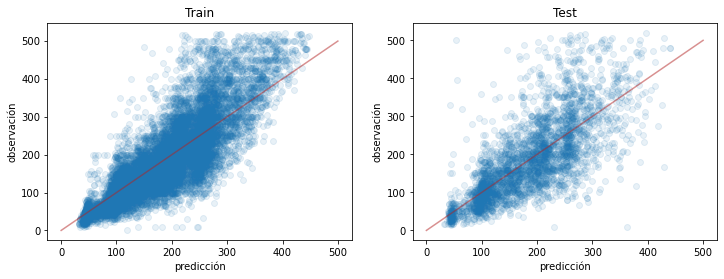

In [78]:
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(12,4))
ax = axes.flatten()

ax[0].scatter(y_pred_train,y_train,alpha=0.1)
ax[0].plot([0,500],[0,500],c='firebrick',alpha=0.5)
ax[0].set_xlabel('predicción')
ax[0].set_ylabel('observación')
ax[0].set_title('Train')
ax[1].scatter(y_pred_test,y_test,alpha=0.1)
ax[1].plot([0,500],[0,500],c='firebrick',alpha=0.5)
ax[1].set_xlabel('predicción')
ax[1].set_ylabel('observación')
ax[1].set_title('Test')

plt.show()

Vemos que, con múltiples dimensiones, el *random forest* no presenta segmentación ni gran similitud con el *decision tree*, como sucedía en el caso unidimiensional. El resultado recuerda al de la regresión lineal, pero el *plot* es algo menos disperso.

In [79]:
print('R2 (train):',r2_score(y_train,y_pred_train))
print('R2 (test): ',r2_score(y_test,y_pred_test))
print()
print('RMSE (train):',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('RMSE (test): ',np.sqrt(mean_squared_error(y_test,y_pred_test)))

R2 (train): 0.6896065380168218
R2 (test):  0.5367871365243136

RMSE (train): 58.95787626238091
RMSE (test):  71.24785149765937


Es el mejor resultado hasta el momento, pero el test pierde *score* respecto al entrenamiento. El modelo quizás esté captando algo de ruido.

---
### 2.3 Dimensiones reducidas

Vamos a aligerar la dimensionalidad del modelo, eliminando aquellas *features* que guardan menor correlación con el *target*: `neighbourhood`, `latitude`, `longitude` y `amenities`.

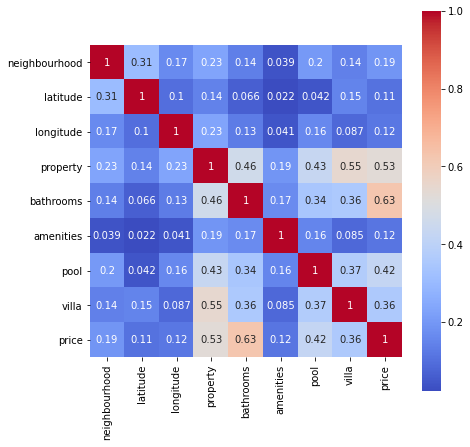

In [80]:
corr = airbnb2.corr()

fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corr,cmap='coolwarm',square=True,annot=True)
plt.show()

In [81]:
airbnb3 = airbnb2.drop(['neighbourhood','latitude','longitude','amenities'],axis=1)
airbnb3

,property,bathrooms,pool,villa,price
0,45,1.0,1,0,89.0
1,60,3.0,0,0,175.0
2,51,2.0,1,0,140.0
3,68,1.0,1,1,200.0
4,16,1.0,1,0,110.0
...,...,...,...,...,...
17603,68,3.5,1,1,195.0
17604,68,3.0,0,1,110.0
17605,68,2.0,1,1,179.0
17606,16,1.0,1,0,42.0


#### 2.3.1 *Train* y *test*

Obtenemos los nuevos *sets* de test y entrenamiento:

In [82]:
X = airbnb3.iloc[:,:-1]
y = airbnb3.iloc[:,-1]

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=86400)

#### 2.3.2 *Linear regression*

Vamos a realizar una regresión lineal con este modelo.

In [84]:
pipe = Pipeline([scaling_step])

X_train_scaled = pipe.fit_transform(X_train)
X_test_scaled = pipe.transform(X_test)

lr = LinearRegression()

lr.fit(X_train_scaled,y_train)
y_pred_train = lr.predict(X_train_scaled)
y_pred_test = lr.predict(X_test_scaled)

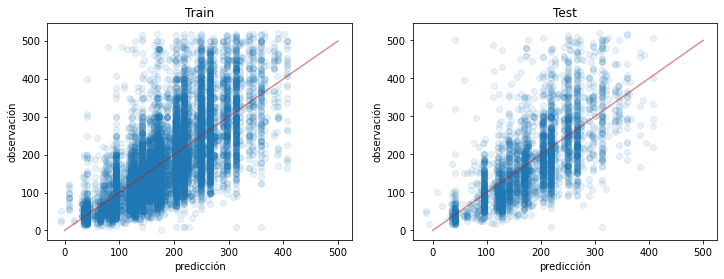

In [85]:
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(12,4))
ax = axes.flatten()

ax[0].scatter(y_pred_train,y_train,alpha=0.1)
ax[0].plot([0,500],[0,500],c='firebrick',alpha=0.5)
ax[0].set_xlabel('predicción')
ax[0].set_ylabel('observación')
ax[0].set_title('Train')
ax[1].scatter(y_pred_test,y_test,alpha=0.1)
ax[1].plot([0,500],[0,500],c='firebrick',alpha=0.5)
ax[1].set_xlabel('predicción')
ax[1].set_ylabel('observación')
ax[1].set_title('Test')

plt.show()

Prevalece la segmentación de los valores predichos, ahora más acusada que en el modelo con todas las dimensiones.

In [86]:
print('R2 (train):',r2_score(y_train,y_pred_train))
print('R2 (test): ',r2_score(y_test,y_pred_test))
print()
print('RMSE (train):',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('RMSE (test): ',np.sqrt(mean_squared_error(y_test,y_pred_test)))

R2 (train): 0.4883415515032721
R2 (test):  0.4667126314115687

RMSE (train): 75.6964693736662
RMSE (test):  76.44729367919986


Los *scores* no difieren apenas de los del caso sin reducir dimensiones.

#### 2.3.3 *Decision tree*

Realizamos un *grid search* para el *decision tree*.

In [87]:
scaling_step = ('scaler',MinMaxScaler())
model_step = ('dtr',DecisionTreeRegressor())

pipe = Pipeline([scaling_step,model_step])

param_grid = {'dtr__max_depth': range(10),
              'dtr__min_samples_leaf': range(10)}

dtr_gs = GridSearchCV(pipe, cv=3, n_jobs=-1, param_grid=param_grid, verbose=1)

dtr_gs.fit(X_train, y_train)

time.sleep(1)

print('Best params: ', dtr_gs.best_params_)
print('Best score: ', dtr_gs.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    6.7s finished


Best params:  {'dtr__max_depth': 7, 'dtr__min_samples_leaf': 5}
Best score:  0.5007514316776976


In [88]:
pipe = Pipeline([scaling_step])

X_train_scaled = pipe.fit_transform(X_train)
X_test_scaled = pipe.transform(X_test)

dtr = DecisionTreeRegressor(max_depth=7,min_samples_leaf=5,random_state=86400)

dtr.fit(X_train_scaled,y_train)
y_pred_train = dtr.predict(X_train_scaled)
y_pred_test = dtr.predict(X_test_scaled)

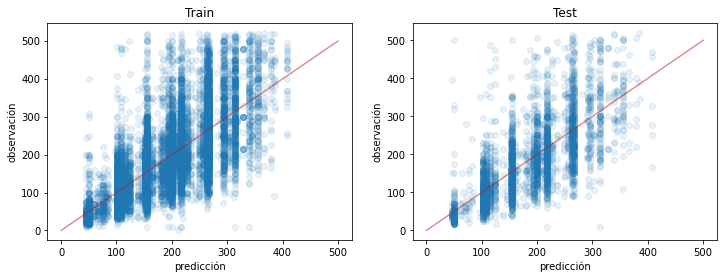

In [89]:
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(12,4))
ax = axes.flatten()

ax[0].scatter(y_pred_train,y_train,alpha=0.1)
ax[0].plot([0,500],[0,500],c='firebrick',alpha=0.5)
ax[0].set_xlabel('predicción')
ax[0].set_ylabel('observación')
ax[0].set_title('Train')
ax[1].scatter(y_pred_test,y_test,alpha=0.1)
ax[1].plot([0,500],[0,500],c='firebrick',alpha=0.5)
ax[1].set_xlabel('predicción')
ax[1].set_ylabel('observación')
ax[1].set_title('Test')

plt.show()

Las predicciones son ahora ligeramente más difusas que en el caso con todas las dimensiones.

In [90]:
print('R2 (train):',r2_score(y_train,y_pred_train))
print('R2 (test): ',r2_score(y_test,y_pred_test))
print()
print('RMSE (train):',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('RMSE (test): ',np.sqrt(mean_squared_error(y_test,y_pred_test)))

R2 (train): 0.5161097226050748
R2 (test):  0.4881357015700871

RMSE (train): 73.61375931848342
RMSE (test):  74.89604532908541


Los *scores* no difieren apenas de los del caso sin reducir dimensiones.

#### 2.3.4 *Random forest*

Vamos con un último modelo; de nuevo *random forest*.

In [91]:
scaling_step = ('scaler',MinMaxScaler())
model_step = ('clf',RandomForestRegressor())

pipe = Pipeline([scaling_step,model_step])

param_grid = {'clf__max_depth': range(5,10),
              'clf__min_samples_leaf': range(10)}

clf_gs = GridSearchCV(pipe, cv=3, n_jobs=-1, param_grid=param_grid, verbose=1)

clf_gs.fit(X_train, y_train)

time.sleep(1)

print('Best params: ', clf_gs.best_params_)
print('Best score: ', clf_gs.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.3min finished


Best params:  {'clf__max_depth': 7, 'clf__min_samples_leaf': 3}
Best score:  0.5028077986697637


In [92]:
pipe = Pipeline([scaling_step])

X_train_scaled = pipe.fit_transform(X_train)
X_test_scaled = pipe.transform(X_test)

clf = RandomForestRegressor(max_depth=7,min_samples_leaf=3,random_state=86400)

clf.fit(X_train_scaled,y_train)
y_pred_train = clf.predict(X_train_scaled)
y_pred_test = clf.predict(X_test_scaled)

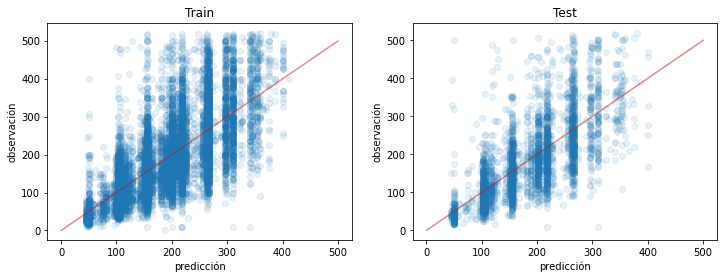

In [93]:
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(12,4))
ax = axes.flatten()

ax[0].scatter(y_pred_train,y_train,alpha=0.1)
ax[0].plot([0,500],[0,500],c='firebrick',alpha=0.5)
ax[0].set_xlabel('predicción')
ax[0].set_ylabel('observación')
ax[0].set_title('Train')
ax[1].scatter(y_pred_test,y_test,alpha=0.1)
ax[1].plot([0,500],[0,500],c='firebrick',alpha=0.5)
ax[1].set_xlabel('predicción')
ax[1].set_ylabel('observación')
ax[1].set_title('Test')

plt.show()

El *scatterplot* es sorprendentemente similar al del *decision tree*.

In [94]:
print('R2 (train):',r2_score(y_train,y_pred_train))
print('R2 (test): ',r2_score(y_test,y_pred_test))
print()
print('RMSE (train):',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('RMSE (test): ',np.sqrt(mean_squared_error(y_test,y_pred_test)))

R2 (train): 0.5181259922250545
R2 (test):  0.4918411556218145

RMSE (train): 73.4602326507537
RMSE (test):  74.62446168888404


Los *scores* también son parecidos, y no consiguen superar a los del caso con todas las dimensiones.

---
## 3. Conclusiones

Se presenta a continuación una tabla-resumen de todas las regresiones realizadas:

In [95]:
pd.DataFrame({'Modelo':['1D LR','1D DT','1D RF','8D LR','8D DT','8D RF','4D LR','4D DT','4D RF'],
              'R2 (train)':[0.396,0.408,0.408,0.493,0.513,0.690,0.488,0.516,0.518],
              'R2 (test)':[0.377,0.387,0.387,0.468,0.492,0.537,0.467,0.488,0.492],
              'RMSE (train)':[82.218,81.416,81.415,75.348,73.869,58.958,75.696,73.614,73.460],
              'RMSE (test)':[82.618,81.980,81.982,76.336,74.596,71.248,76.447,74.896,74.624]})

,Modelo,R2 (train),R2 (test),RMSE (train),RMSE (test)
0,1D LR,0.396,0.377,82.218,82.618
1,1D DT,0.408,0.387,81.416,81.980
2,1D RF,0.408,0.387,81.415,81.982
3,8D LR,0.493,0.468,75.348,76.336
4,8D DT,0.513,0.492,73.869,74.596
5,8D RF,0.690,0.537,58.958,71.248
6,4D LR,0.488,0.467,75.696,76.447
7,4D DT,0.516,0.488,73.614,74.896
8,4D RF,0.518,0.492,73.460,74.624


El modelo con los mejores *scores* es el *random forest* de 8 dimensiones, el cual predice los precios de alquiler con un error (RMSE) de \$71.25.

A continuación se repite dicha regresión, cuyos parámetros son `max_depth = 12`, `min_samples_leaf = 4`.

In [96]:
X = airbnb2.iloc[:,:-1]
y = airbnb2.iloc[:,-1]

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=86400)

In [98]:
pipe = Pipeline([scaling_step])

X_train_scaled = pipe.fit_transform(X_train)
X_test_scaled = pipe.transform(X_test)

clf = RandomForestRegressor(max_depth=12,min_samples_leaf=4,random_state=86400)

clf.fit(X_train_scaled,y_train)
y_pred_train = clf.predict(X_train_scaled)
y_pred_test = clf.predict(X_test_scaled)

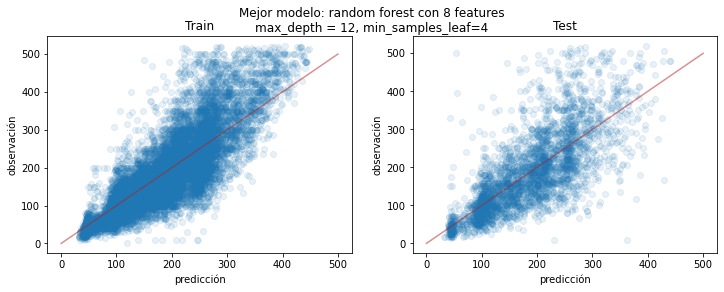

In [99]:
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(12,4))
ax = axes.flatten()

ax[0].scatter(y_pred_train,y_train,alpha=0.1)
ax[0].plot([0,500],[0,500],c='firebrick',alpha=0.5)
ax[0].set_xlabel('predicción')
ax[0].set_ylabel('observación')
ax[0].set_title('Train')
ax[1].scatter(y_pred_test,y_test,alpha=0.1)
ax[1].plot([0,500],[0,500],c='firebrick',alpha=0.5)
ax[1].set_xlabel('predicción')
ax[1].set_ylabel('observación')
ax[1].set_title('Test')

plt.suptitle('Mejor modelo: random forest con 8 features\nmax_depth = 12, min_samples_leaf=4')

plt.show()